Уровень 1: Найдите спектральное разложение матрицы: 
m = np.array([[1, 2], [2,3]]) print(m)

Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - документация по PCA

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html  - документация по MSE

Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [7]:
# спектральное разложение
m = np.array([[1, 2], [2,3]]) 
print(m)

[[1 2]
 [2 3]]


In [8]:
a, U = np.linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [9]:
print(np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

[[1. 2.]
 [2. 3.]]


_________

График зависимости качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA

<Figure size 432x288 with 0 Axes>

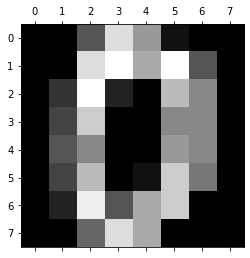

In [132]:
# загружаем цифры и выбираем 0
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [133]:
d = digits.images[0]
digits.images[0]

array([[0.00, 0.00, 5.00, 13.00, 9.00, 1.00, 0.00, 0.00],
       [0.00, 0.00, 13.00, 15.00, 10.00, 15.00, 5.00, 0.00],
       [0.00, 3.00, 15.00, 2.00, 0.00, 11.00, 8.00, 0.00],
       [0.00, 4.00, 12.00, 0.00, 0.00, 8.00, 8.00, 0.00],
       [0.00, 5.00, 8.00, 0.00, 0.00, 9.00, 8.00, 0.00],
       [0.00, 4.00, 11.00, 0.00, 1.00, 12.00, 7.00, 0.00],
       [0.00, 2.00, 14.00, 5.00, 10.00, 12.00, 0.00, 0.00],
       [0.00, 0.00, 6.00, 13.00, 10.00, 0.00, 0.00, 0.00]])

In [125]:
# создаем график для оценки качества восстановления цифр в заваисимотси от кол-ва компонент PCA
d = digits.images[0]
pca_dict = {}
for n in range(1,9):
    pca = PCA(n_components=n)
    tranformed = pca.fit_transform(d)
    new = pca.inverse_transform(tranformed)
    mse = mean_squared_error(d, new, squared=False)
    pca_dict[n] = mse

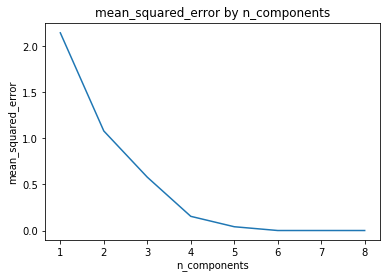

In [126]:
# График
pca_list = sorted(pca_dict.items())
x, y = zip(*pca_list) 

plt.plot(x, y)
plt.ylabel('mean_squared_error')
plt.xlabel('n_components')
plt.title('mean_squared_error by n_components')
plt.show()